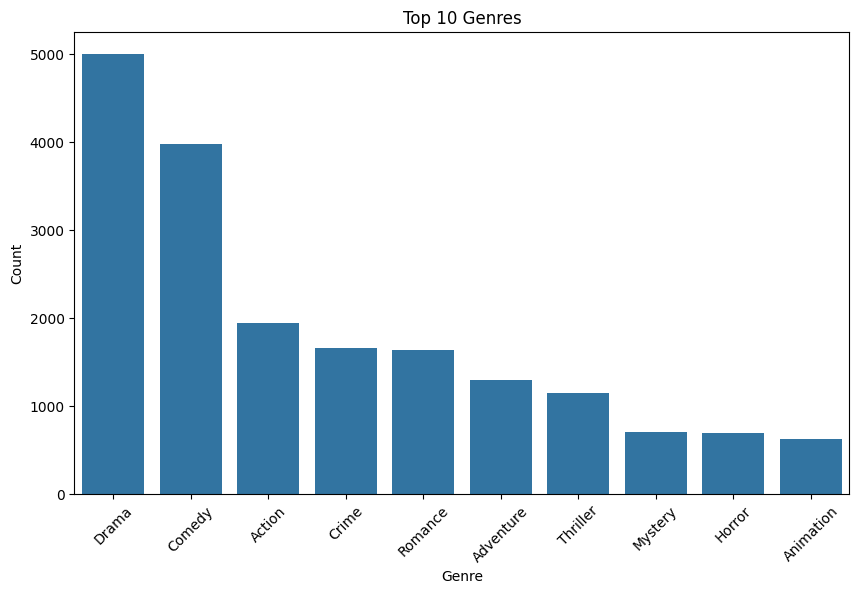

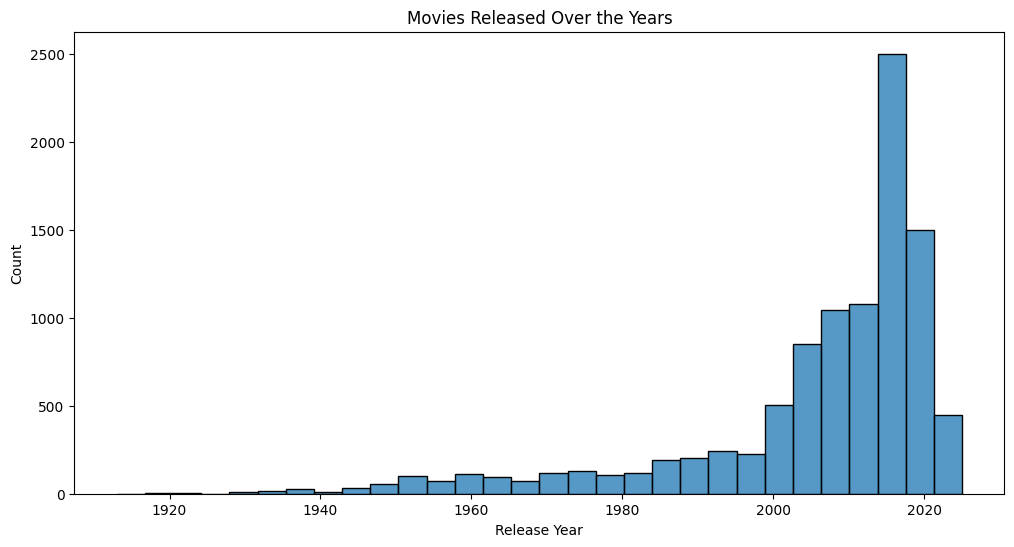

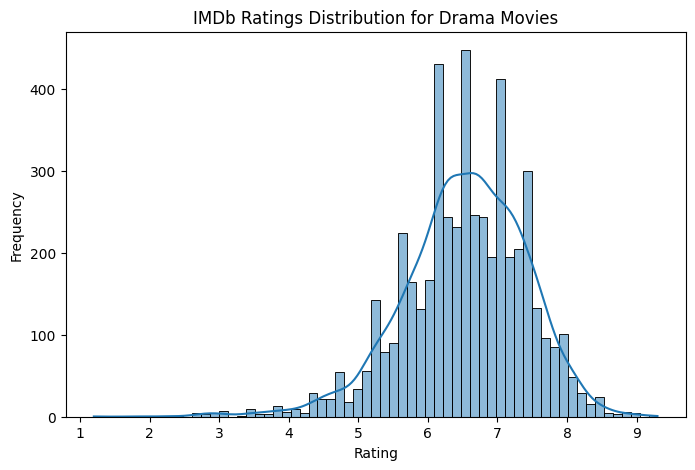

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset
df = pd.read_csv("../data/data.csv").head(10000)
df.dropna(subset=["genres", "releaseYear", "imdbAverageRating"], inplace=True)
df["genres"] = df["genres"].apply(lambda x: x.split(", "))

# Genre distribution
all_genres = [genre for sublist in df["genres"] for genre in sublist]
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df.head(10), x="Genre", y="Count")
plt.title("Top 10 Genres")
plt.xticks(rotation=45)
plt.show()

# Release year trends
plt.figure(figsize=(12, 6))
sns.histplot(df["releaseYear"], bins=30, kde=False)
plt.title("Movies Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

# Rating distribution by top genre
top_genre = genre_df.iloc[0]["Genre"]
top_genre_movies = df[df["genres"].apply(lambda g: top_genre in g)]

plt.figure(figsize=(8, 5))
sns.histplot(top_genre_movies["imdbAverageRating"], kde=True)
plt.title(f"IMDb Ratings Distribution for {top_genre} Movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
